<a href="https://colab.research.google.com/github/RaulMedeiros/Seattle_Incidents_Report/blob/master/Seattle_Incident_Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Seattle Police Department Data Analysis




## Environment configuration

In [0]:
## To update Seaborn default version please execute this code. 
## The Notebook will automatically restart.
## Please execult this script block only once!
!pip install -q seaborn --upgrade
import os
import signal
os.kill(os.getpid(), signal.SIGKILL)

In [3]:
# import data manipulation libs
import itertools
import datetime
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None

# import visualization libs
import matplotlib.pyplot as plt
import seaborn as sns
print(sns.__version__)
sns.set_style("darkgrid")

# import warnings
# warnings.simplefilter(action='ignore', category=FutureWarning)
log = True

0.9.0


## Import & Clean Data

In [2]:
# Upload file from Local System
from google.colab import files
uploaded = files.upload()
!ls

Saving use-of-force.csv to use-of-force.csv
sample_data  use-of-force.csv


In [50]:
# Load data file (csv) into a DataFrame
df_src_w_nan = pd.read_csv("use-of-force.csv")
# Print Sample
if(log): display(df_src_w_nan.head(3))

,ID,Incident_Num,Incident_Type,Occured_date_time,Precinct,Sector,Beat,Officer_ID,Subject_ID,Subject_Race,Subject_Gender
0,18412-2238-14470,18412,Level 1 - Use of Force,2017-11-28T01:40:00,NaN,-,NaN,2238,14470,Black or African American,Female
1,16162-1589-12833,16162,Level 1 - Use of Force,2017-06-22T04:15:00,NaN,-,NaN,1589,12833,Black or African American,Male
2,15041-2017-12130,15041,Level 1 - Use of Force,2017-03-30T15:59:00,NaN,-,NaN,2017,12130,White,Male


In [51]:
## Revove duplicates
print('Revove duplicates rows')
print('Before:',len(df_src_w_nan),'samples')
df_src_w_nan.drop_duplicates()
print('After:',len(df_src_w_nan),'samples')

# Print Sample
if(log): display(df_src_w_nan.head(3))

Revove duplicates rows
Before: 8061 samples
After: 8061 samples


,ID,Incident_Num,Incident_Type,Occured_date_time,Precinct,Sector,Beat,Officer_ID,Subject_ID,Subject_Race,Subject_Gender
0,18412-2238-14470,18412,Level 1 - Use of Force,2017-11-28T01:40:00,NaN,-,NaN,2238,14470,Black or African American,Female
1,16162-1589-12833,16162,Level 1 - Use of Force,2017-06-22T04:15:00,NaN,-,NaN,1589,12833,Black or African American,Male
2,15041-2017-12130,15041,Level 1 - Use of Force,2017-03-30T15:59:00,NaN,-,NaN,2017,12130,White,Male


In [52]:
# Remove Rows with Nan Values
print('Revove rows with Nan Values')
print('Before:',len(df_src_w_nan),'samples')
df_src = df_src_w_nan.dropna()
print('After:',len(df_src),'samples')

# Print Sample
if(log): display(df_src.head(3))

Revove rows with Nan Values
Before: 8061 samples
After: 6242 samples


,ID,Incident_Num,Incident_Type,Occured_date_time,Precinct,Sector,Beat,Officer_ID,Subject_ID,Subject_Race,Subject_Gender
17,11865-1741-4871,11865,Level 1 - Use of Force,2016-07-19T06:40:00,E,E,E1,1741,4871,Black or African American,Male
18,11898-1840-9082,11898,Level 1 - Use of Force,2016-07-21T16:12:00,E,C,C2,1840,9082,White,Female
20,10710-1065-2989,10710,Level 2 - Use of Force,2016-05-01T19:30:00,W,K,K1,1065,2989,White,Male


## Questão 1:

Como é a distribuição do uso de força dentre as delegacias e os setores? Em cada setor, qual o *beat* com
maior número de incidentes? Apresente também o ranking dos setores segundo o percentual de incidentes
"Level 2" em relação ao total de incidentes do respectivo setor.


### Como é a distribuição do uso de força dentre os setores? 

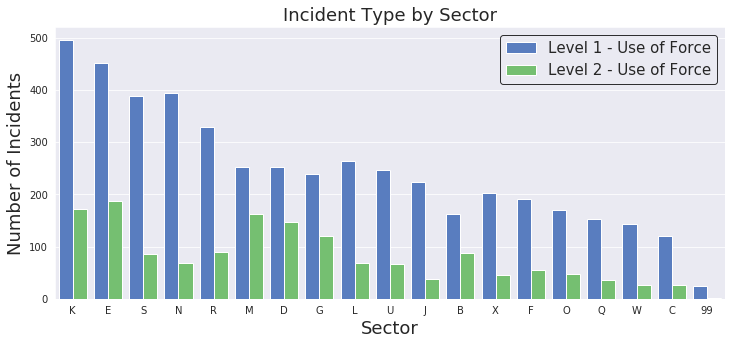

In [53]:
# Sort Data
order = df_src['Sector'].value_counts().index

# Figure properties
fig = plt.figure(figsize=(12,5))

# Palette configurations
deep_pal = sns.color_palette('muted')
pal = sns.blend_palette([deep_pal[0], deep_pal[2]],2)

# Plot
hist_precinct = sns.countplot(x="Sector",
                              hue="Incident_Type",
                              order = order,
                              data=df_src,
                              palette= pal)

# Adjustments to the plot properties
leg = plt.legend(fontsize=15,frameon=True)
leg.get_frame().set_edgecolor('black')
plt.title('Incident Type by Sector', fontsize=18)    
plt.ylabel('Number of Incidents', fontsize=18)
plt.xlabel('Sector', fontsize=18)
plt.show()

### Como é a distribuição do uso de força dentre as delegacias? 

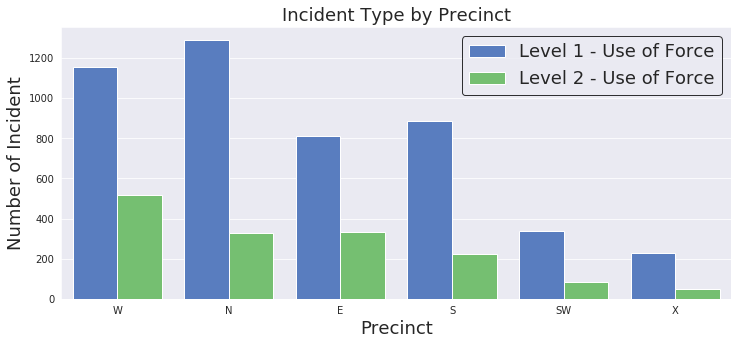

In [54]:
# Sort Data
order = df_src['Precinct'].value_counts().index

# Figure properties
fig = plt.figure(figsize=(12,5))

# Plot
hist_precinct = sns.countplot(x = "Precinct",
                              hue = "Incident_Type",
                              order = order,
                              data = df_src,
                              palette = pal)

# Adjustments to the plot properties
leg = plt.legend(fontsize=18,frameon=True)
leg.get_frame().set_edgecolor('black')
plt.title('Incident Type by Precinct', fontsize=18)    
plt.ylabel('Number of Incident', fontsize=18)
plt.xlabel('Precinct', fontsize=18)
plt.show()

### Estas distribuições pode ser analisados sobre uma perspectiva alternativa.


In [0]:
def heatmap(src_mat, 
            classesX=[],
            classesY=[],
            ylabel = '',
            xlabel = '',
            normalize=False,
            figsize=(12,10),
            title='Tab_Heatmap',
            fraction = 0.016,
            cmap=plt.cm.Blues):
  
  """ This function plots a Heatmap and its values """   
 
  #Normalize if requested
  if normalize:
      src_mat = src_mat.astype('float') / src_mat.sum(axis=1)[:, np.newaxis]
      src_mat

  # Figure size configuration
  fig = plt.figure(figsize=figsize)

  # Plot Heatmap
  im = plt.imshow(src_mat, interpolation='nearest', cmap=cmap)

  # Simplify label
  fmt = '.2f' if normalize else 'd'
  thresh = src_mat.max() / 2.

  #Plot text over the heatmap
  for i, j in itertools.product( range(src_mat.shape[0]),
                                 range(src_mat.shape[1])):
      # Change color of the text based on the background color
      color = "white" if src_mat[i, j] > thresh else "black"
      
      plt.text(j, i, format(src_mat[i, j], fmt),
               horizontalalignment="center",
               color=color)

  # Plot Properties    
  plt.tight_layout()
  plt.title(title, fontsize=18)    
  plt.ylabel(ylabel, fontsize=18)
  plt.xlabel(xlabel, fontsize=18)
  tick_marksX = np.arange(len(classesX))
  tick_marksY = np.arange(len(classesY))
  plt.xticks(tick_marksX, classesX)
  plt.yticks(tick_marksY, classesY)
  plt.colorbar(fraction=fraction, pad=0)
  plt.grid(False)
      
def dist_aggregation(df,x_col,y_col):
  """ This function generates 2D Matrix based on 2 columns of a DataFrame """   

  # Compute unique values of each column
  uniq_x = pd.unique(df[x_col])
  uniq_y = pd.unique(df[y_col])

  # Create a 2D Matrix with zeros
  result = np.zeros((len(uniq_x),len(uniq_y)),dtype=int)

  # Brute Force Aggregation
  for x_id, x_key in enumerate(uniq_x):
    for y_id, y_key in enumerate(uniq_y):
      condition1 = (df[x_col] == x_key)
      condition2 = (df[y_col] == y_key)          
      result[x_id,y_id] = len( df[ condition1 & condition2 ])      
  return result, uniq_x ,uniq_y

type_by_sector, uniq_type, uniq_sector = dist_aggregation(df_src,
                                                          "Incident_Type",
                                                          "Sector")

type_by_precinct, uniq_type, uniq_precinct = dist_aggregation(df_src,
                                                              "Incident_Type",
                                                              "Precinct")
    

#### Como é a distribuição do uso de força dentre os setores? 

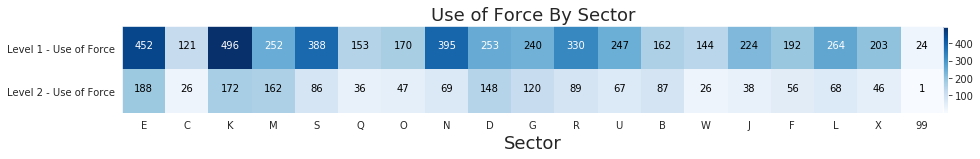

In [56]:
# Plot Normalized Use of force Heatmap By Sector
heatmap(type_by_sector, 
        ylabel = '',
        xlabel = 'Sector',
        classesY = uniq_type,
        classesX = uniq_sector,
        fraction = 0.0052,
        title='Use of Force By Sector');

Este mapa de calor representa a distribuição dos incidentes por seção. Nele, o número de incidentes por setor esta representados em seus valores absolutos e a cor do quadro é proporcional ao mesmo.

#### Como é a distribuição do uso de força dentre as delegacias? 

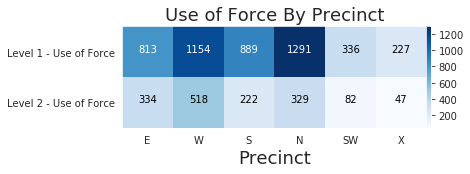

In [57]:
# plot the normalized "Use of Force By Precinct"
heatmap(type_by_precinct, 
            ylabel = '',
            xlabel = 'Precinct',
            classesY = uniq_type,
            classesX = uniq_precinct,
            figsize=(8,2),
            title='Use of Force By Precinct')

### Em cada setor, qual o *beat* com maior número de incidentes? 

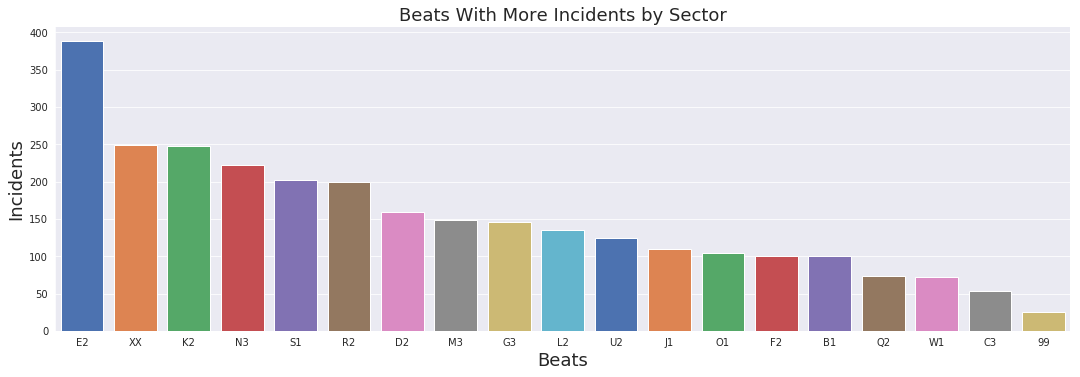

In [59]:
# Compute the number of Incidents by each Beat
df = df_src[['Sector','Beat']]
df = df.groupby(by=['Sector','Beat'],as_index=False).agg(len)
df = df.reset_index()
df.columns = ['Sector', 'Beat','Incidents']

# Sort each Sector by the number of Incidents
df = df.sort_values(['Sector','Incidents'],ascending=False)

# Select the Beat with more Incidents
df = df.groupby('Sector').head(1)

# Sort 'greatest' Beats by Incidents number
df = df.sort_values(['Incidents'],ascending=False)

# Plot BarGraph with the result
g=sns.catplot(x="Beat", y="Incidents",palette="deep",
             data=df, saturation=1,
             kind="bar", ci=None, aspect=3)

# Adjustments to the plot properties
plt.title('Beats With More Incidents by Sector', fontsize=18)   
plt.ylabel('Incidents', fontsize=18)
plt.xlabel('Beats', fontsize=18)

# Show image
plt.show()

### Apresente o ranking dos setores segundo o percentual de incidentes "Level 2" em relação ao total de incidentes do respectivo setor.

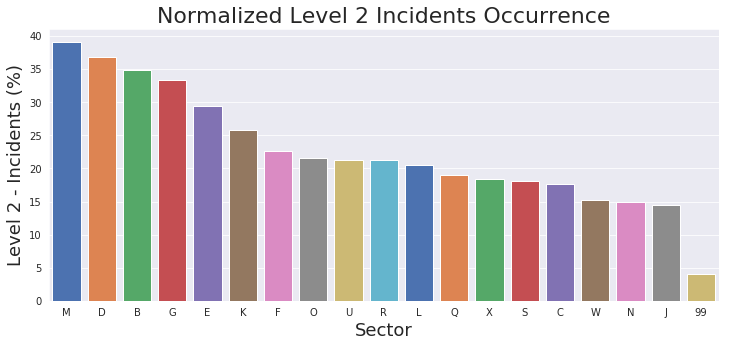

In [60]:
# Figure configurations
fig = plt.figure(figsize=(12,5))

# Compute Incidents by Sector
df_total = df_src['Sector'].value_counts()

# Compute Incidents Level 2 by Sector
df_lvl2 = df_src[df_src['Incident_Type'] == 'Level 2 - Use of Force']
s_sector_count = df_lvl2['Sector'].value_counts()

# Compute percet of Level 2 Incidents
df_lvl2_norm = (s_sector_count *100/ df_total).to_frame().reset_index()
df_lvl2_norm.columns = ['Sector', 'Normalized Level 2 Incidents']

# Sort Values
df_lvl2_norm.sort_values(by=['Normalized Level 2 Incidents'],
                         inplace=True,
                         ascending=False)
# Plot Results
sns.barplot(x='Sector',
            y="Normalized Level 2 Incidents",
            saturation=1,
            data=df_lvl2_norm,
            palette="deep")

# Adjustments to the plot properties
plt.title('Normalized Level 2 Incidents Occurrence', fontsize=22)
plt.xlabel('Sector', fontsize = 18)
plt.ylabel("Level 2 - Incidents (%)", fontsize=18)

# Show image
plt.show()

Após a normalização das ocorrências, identificou-se que a distribuição mudou em termos do setor. Por exemplo, o setor K que ante ocupada o primeiro lugar no *ranking*, agora está em 6o lugar. Enquanto o setor M passou a ser o primeiro.



## Questão 2:

Com relação à distribuição dos incidentes no tempo, é possível observar momentos dentro dos dias ou dias
da semana nos quais os incidentes "Level 2" ocorrem com maiores chances?

### Per hour

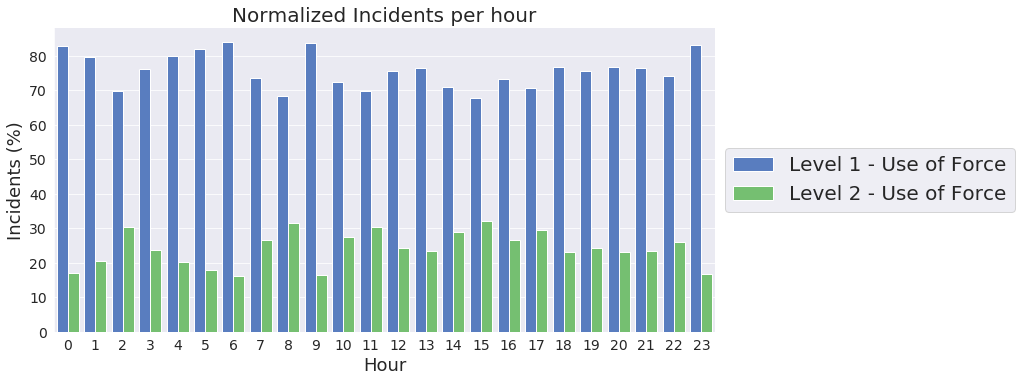

In [61]:
# Load Data
df = df_src.copy()

# Turn Occured_date_time into a datetime object
df['Occured_date_time'] = pd.to_datetime(df_src['Occured_date_time'],
                                         format='%Y-%m-%d %H:%M:%S')

# Create column hours
df['hours'] = df['Occured_date_time'].dt.hour

#Simplify DataFrame
df = df[['hours','Incident_Type']]

# Groups incidents by the hour of occurrence
df_total = df.groupby('hours', as_index=False).agg(len)
df_total.columns = ['hours','Total Number of Incidents']

# Groups incidents by the hour of occurrence and Incident_Type
df = df.groupby(['hours','Incident_Type'], as_index=False).agg(len)
df = df.reset_index()
df.columns = ['hours','Incident_Type','Number of Incidents']

# Merge Dataframes
df_res = pd.merge(df,df_total , on='hours')

# Compute proportion in percent
df_res['metric'] = df_res['Number of Incidents']*100/df_res['Total Number of Incidents']

#show only Level 2 - Use of Force normalized results
#df_res = df_res[df_res['Incident_Type'] == 'Level 2 - Use of Force']

# Palette configurations
deep_pal = sns.color_palette('muted')
pal = sns.blend_palette([deep_pal[0], deep_pal[2]],2)

# Plot
g = sns.catplot(x = 'hours',
                y = 'metric',
                hue = 'Incident_Type',
                kind = 'bar',
                aspect = 2,
                palette = pal,
                data = df_res,
                legend = False)

# Adjustments to the plot properties
g.ax.legend(fontsize=20,loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Normalized Incidents per hour', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.xlabel('Hour', fontsize=18)
plt.ylabel('Incidents (%)', fontsize=18)

# Show image
plt.show()

#### Conclusão:
Pela distribuição de frequência por horas parece não haver uma relação direta com o percentual de incidentes. Logo, não pode-se inferir qual horário do dia com mais ocorrências.

### Per day of the week

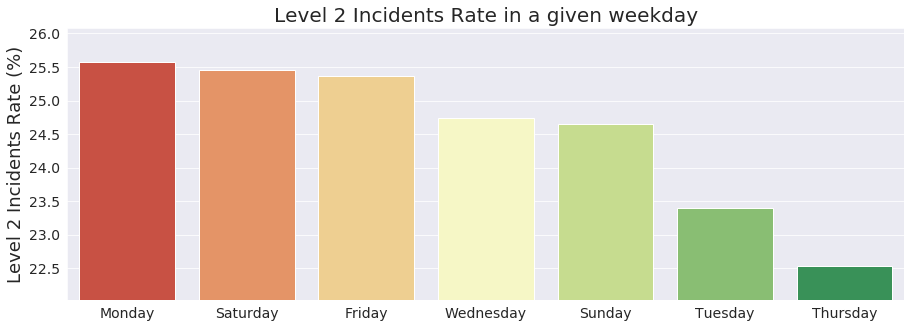

In [62]:
def week_days_plot(df,
                   title='Level-2 Incidents per weekday - Sorted',
                   ylabel='Level 2 Incidents Rate (%)'):
  # Figure configurations
  plt.figure(figsize=(15,5))

  # Palette configurations
  num_colors = len(df.Weekday_name)
  pal = sns.color_palette('RdYlGn',num_colors)

  # Plot 
  sns.barplot(df.Weekday_name, df['metric']*100, palette=pal)

  # Adjustments to the plot properties
  plt.title(title, fontsize=20)
  plt.tick_params(axis='both', which='major', labelsize=14)
  plt.xlabel('', fontsize=18)
  plt.ylabel(ylabel, fontsize=18)
  
  min_v = (df['metric'].min()*100)-0.5
  max_v = (df['metric'].max()*100)+0.5
  plt.ylim([min_v,max_v])

  # Show image
  plt.show()
  
# Turn Occured_date_time into a datetime object
df = df_src.copy()

df.loc[:, 'Occured_date_time'] = pd.to_datetime(df_src['Occured_date_time'],
                                                format='%Y-%m-%d')
  
# Add weekdays (intergers) as a column
df['weekday_id'] = df['Occured_date_time'].dt.weekday

# Groups incidents by the hour of occurrence
df_total = df[['weekday_id','Incident_Type']].groupby('weekday_id',
                                                      as_index=False).agg(len)
df_total.columns = ['weekday_id','Total Number of Incidents']  
  
# Select only Level 2 Incidents
df = df[df['Incident_Type'] == 'Level 2 - Use of Force']

# Group by weekday and count Incident
df = df[['Incident_Type','weekday_id']]
df = df.groupby('weekday_id', as_index=False).agg('count')
df.columns = ['weekday_id', 'Level 2 Incidents']

# Add weekdays names (str) as a column
df['Weekday_name'] = ['Sunday', 'Monday', 'Tuesday', 'Wednesday',\
                      'Thursday', 'Friday', 'Saturday']
# Merge Data Frames
df = pd.merge(df,df_total, on='weekday_id')

# Compute 'Level 2 Incidents Rate in a given weekday' metric
df['metric'] = df['Level 2 Incidents']/df['Total Number of Incidents']

#Sort by the Number of Incident
df.sort_values(by='metric', ascending=False, inplace=True)

# Plot
week_days_plot(df, title='Level 2 Incidents Rate in a given weekday')

#### Conclusion:

Ou contrário da distribuiçao por dias do mês, nos dias próximos ao final de semana houve mais ocorrências que durante a semana.

### Aditional Perspectives

#### Per day of the month

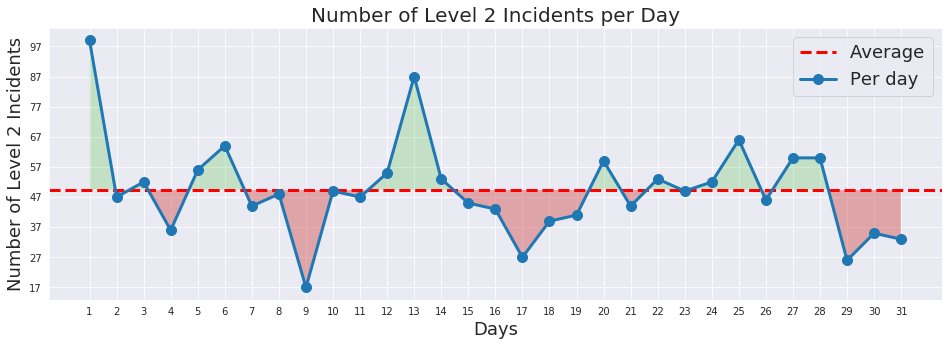

In [63]:
# Data
df = df_src.copy()

# Turn Occured_date_time into a datetime object
df['Occured_date_time'] = pd.to_datetime(df['Occured_date_time'],
                                         format='%Y-%m-%d %H:%M:%S')

# Compute Incidents Level 2 by Sector
df = df[['Incident_Type','Occured_date_time']]
df_lvl2 = df[df['Incident_Type'] == 'Level 2 - Use of Force']

df_lvl2['day'] = df_lvl2['Occured_date_time'].dt.day
# df_lvl2 = df_lvl2.drop(['Occured_date_time'], axis=1)
output_df = df_lvl2.groupby('day', as_index=False) \
                   .agg('count') \
                   .rename(columns={'Incident_Type':'Level 2 Incidents'})

mean_line = np.ones(31)*output_df['Level 2 Incidents'].mean()

# Figure configuration
plt.figure(figsize=(16,5))

# Palette configurations
deep_pal = sns.color_palette('muted')

# plot Average Line
plt.axhline(output_df['Level 2 Incidents'].mean(),
            color = 'r',
            linestyle='--',
            linewidth=3)

# Plot Incidents per Day of the month
plt.plot(output_df['day'],
         output_df['Level 2 Incidents'],
         alpha = 1,
         marker='o',
         markersize=10,
         linewidth=3) 

plt.fill_between(output_df['day'],
                 output_df['Level 2 Incidents'],
                 mean_line,
                 where=mean_line >= output_df['Level 2 Incidents'],
                 facecolor=deep_pal[3],
                 alpha = 0.5,
                 interpolate=True)

plt.fill_between(output_df['day'],
                 output_df['Level 2 Incidents'],
                 mean_line,
                 where=mean_line <= output_df['Level 2 Incidents'],
                 facecolor=deep_pal[2],
                 alpha = 0.3,
                 interpolate=True)

# Adjustments to the plot properties
xs = np.linspace(1,31)
plt.xticks(np.arange(min(xs), max(xs)+1, 1.0))
vmax = output_df['Level 2 Incidents'].max()+5
vmin = output_df['Level 2 Incidents'].min()
plt.yticks(np.arange(vmin, vmax, 10))
plt.title('Number of Level 2 Incidents per Day', fontsize=20);
plt.legend(['Average', 'Per day'], fontsize=18)
plt.xlabel('Days', fontsize=18)
plt.ylabel('Number of Level 2 Incidents', fontsize=18)

# Show image
plt.show()

Ao analisar-se os dias do mês, identificou-se que o primeiro e o 15o dia possuem quantidades de ocorrências acima da média.

#### Per month

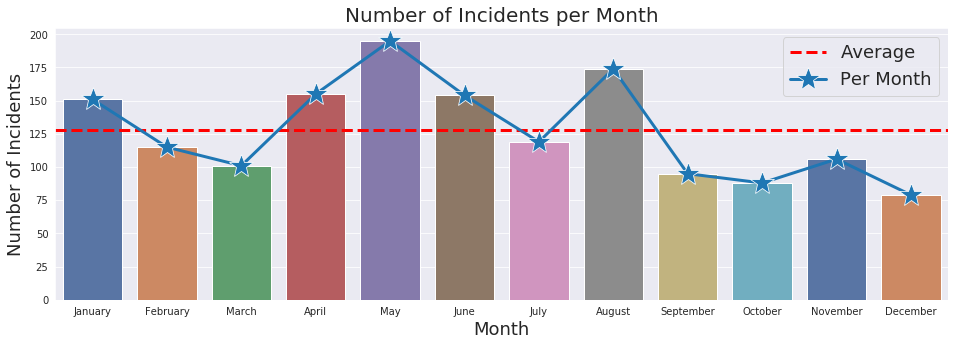

In [64]:
# Data
df = df_src.copy()

# Turn Occured_date_time into a datetime object
df['Occured_date_time'] = pd.to_datetime(df['Occured_date_time'],
                                         format='%Y-%m-%d %H:%M:%S')

# Compute Incidents Level 2 by Sector
df_lvl2 = df[df['Incident_Type'] == 'Level 2 - Use of Force']

# Data
df_lvl2['month'] = df_lvl2['Occured_date_time'].dt.month
df_lvl2 = df_lvl2[['month','Incident_Type']]
output_df = df_lvl2.groupby('month', as_index=False).agg('count')

output_df['month_name'] = [datetime.date(2000, m, 1).strftime('%B') for m in range(1, 13)]

# Figure configuration
plt.figure(figsize=(16,5))

# plot Average Line
plt.axhline(output_df['Incident_Type'].mean(),
            color = 'r',
            linestyle='--',
            linewidth=3)

# Plot Incidents per month
sns.lineplot(output_df['month']-1,
             output_df['Incident_Type'],
             marker='*',
             palette='deep',
             markersize=25,
            # saturation=1,
             linewidth=3) 
# Plot 
sns.barplot(output_df['month_name'], output_df['Incident_Type'], palette="deep")

#Adjustments to the plot properties
xs = np.linspace(1,13)
plt.title('Number of Incidents per Month', fontsize=20);
plt.legend(['Average', 'Per Month'], fontsize=18)
plt.xlabel('Month', fontsize=18)
plt.ylabel('Number of Incidents', fontsize=18)

# Show image
plt.show()

## Questão 3:

A polícia deseja dar início a uma investigação interna para verificar se existem policiais excessivamente
violentos. No entanto, o prazo para o término desta investigação é bastante limitado. Elabore um script capaz
de elencar os policiais em ordem decrescente de chance de violência excessiva com base no número de
incidentes dos quais eles participaram. Existe alguma relação entre o número de incidentes dos quais um
policial participa e a sua probabilidade de participar de um incidente "Level 2"?

### Existe alguma relação entre o número de incidentes dos quais um policial participa e a sua probabilidade de participar de um incidente "Level 2"?

In [65]:
#Officers Sorted by the Total Number of Incidents
df_total = df_src_w_nan.groupby(['Officer_ID'], as_index=True) \
                 .agg({'Incident_Type': 'count'}) \
                 .rename(columns={'Incident_Type':'Total Incidents'})\
                 .reset_index()

#Select Level 2 Incidents
df_lvl2 = df_src_w_nan[df_src_w_nan['Incident_Type']== 'Level 2 - Use of Force']

#Officers sorted by the Number of Level 2 Incidents
df_cops_sort_lv2 = df_lvl2.groupby(['Officer_ID'], as_index=True) \
                         .agg({'Incident_Type': 'count'}) \
                         .rename(columns={'Incident_Type':'Level 2 Incidents'})\
                         .reset_index()

# Merge Data Frames
df_officers = pd.merge(df_cops_sort_lv2,df_total, on='Officer_ID')
  
df_officers['Level 1 Incidents'] = df_officers['Total Incidents'] - df_officers['Level 2 Incidents']

# Compute metric
df_officers['metric'] = df_officers['Level 2 Incidents']*100/df_officers['Total Incidents']
if(log): display(df_officers.head(3))


,Officer_ID,Level 2 Incidents,Total Incidents,Level 1 Incidents,metric
0,72,1,1,0,100.000000
1,102,1,24,23,4.166667
2,113,1,1,0,100.000000


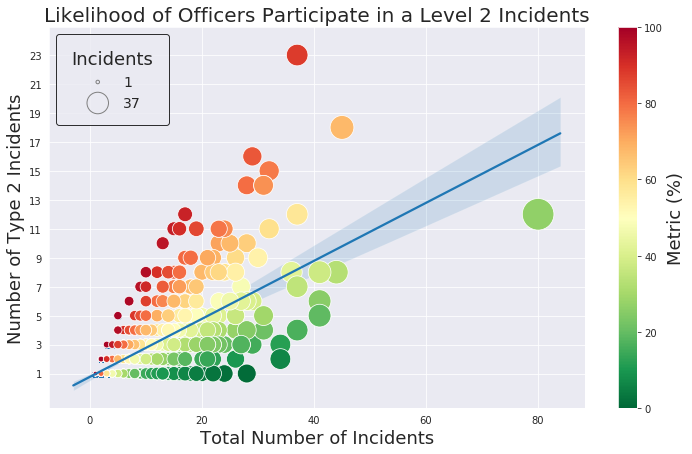

In [66]:
# Figure configuration
plt.figure(figsize=(12,7))

# Plot Regression Line
sns.regplot(x='Total Incidents', y='Level 2 Incidents', data=df_officers)

# Palette configurations
cmap = 'RdYlGn_r'
uniq_metrics = df_officers['metric'].unique().size
pal = sns.color_palette(cmap,uniq_metrics)

# Plot Data
sizes = (20,1000)
ax = sns.scatterplot(x='Total Incidents',
                     y='Level 2 Incidents',
                     data=df_officers,
                     hue='metric',
                     size='Total Incidents',
                     sizes=sizes,
                     palette=pal,
                     legend=False)

# Make a legend: (legend='brief' isn't properly working)
si = np.sort(df_officers['Total Incidents'].values)
scale=sizes[1]/si[-1]
si = si[[1,-10]]

def print_circle(pw,scale):
  plt.scatter(x = [],
              y = [],
              edgecolors = "gray",
              s = pw*scale,
              c = '',
              label =str(pw) )
[print_circle(pw,scale) for pw in si]

h, l = plt.gca().get_legend_handles_labels()
leg = plt.legend(h,l,
                 title = "Incidents",
                 borderpad = 1.1,
                 edgecolor = 'black',
                 fontsize = 14,
                 frameon = True,
                 loc = 'upper left'
                )
plt.setp(leg.get_title(),fontsize=18)

# Adjustments to the plot properties
plt.title('Likelihood of an Officers Participate in a Level 2 Incidents',
          fontsize=20)
plt.xlabel('Total Number of Incidents',fontsize=18)
vmax = df_officers['Level 2 Incidents'].max()+2
vmin = df_officers['Level 2 Incidents'].min()
plt.yticks(np.arange(vmin,vmax,2))
plt.ylabel('Number of Type 2 Incidents',fontsize=18)

# Make and ajust a colorbar
norm = plt.Normalize(vmin=np.min(0), vmax=np.max(100))
sm = plt.cm.ScalarMappable(cmap = cmap, norm = norm)
sm.set_array([])
cb = plt.colorbar(sm)
plt.setp(cb.set_label('Metric (%)',fontsize=18))

#### Conclusão:
Há uma correlação positiva entre o número total de incidentes e a quantidade de incidentes do Level-2. No gráfico acima o diâmetro do marcador representa o número total de incidentes, de cada policial. Enquanto que, a cor o percentual de casos, daquele mesmo policial, do Level-2.

O curioso é que esperava-se que os policiais que os policiais que possuiam maiores números de ocorrências totais deveriam ter maiores métricas. Entretanto, os policiais com piores índices possuem menos de 20 casos registrados.

## Questão 4:

Uma métrica interessante para a polícia é o grau de reincidência por parte dos civis. Apresente o percentual
de casos reincidentes em relação ao total de incidentes em cada setor e verifique se há correlação entre esta
métrica e o percentual de incidentes "Level 2" calculado na questão 1. E a nível individual, existe alguma
relação entre o grau de reincidência de um civil e a sua probabilidade de participar de incidentes "Level 2"?

### Apresente o percentual de casos reincidentes em relação ao total de incidentes em cada setor 



In [0]:
# Considereing this is a non-recidivism case
df = df_src[df_src['Subject_ID'] == 341]
if(log): df.head(3)

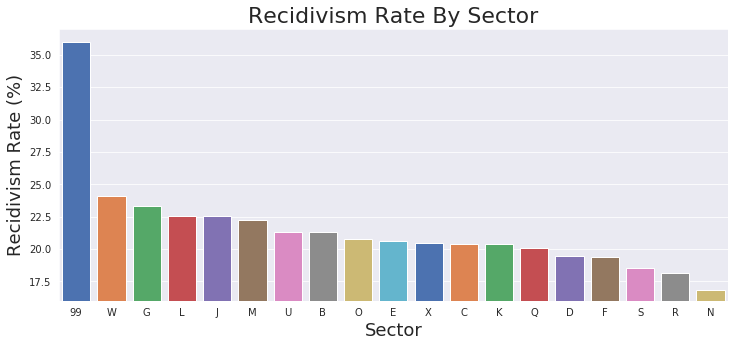

In [68]:
# Figure configurations
fig = plt.figure(figsize=(12,5))

# Compute Incidents by Sector
total_inc_sec = df_src['Sector'].value_counts()

# Compute recidivism cases by Sector
df = df_src[['Subject_ID','Sector']]
df = df.groupby(by = ['Sector','Subject_ID'],as_index = False)
df = df.agg(len).reset_index()
df = df.rename(columns = {0:'recidivism'})

# Filter Non-recidivism Subject
df = df[df['recidivism'] > 1]
rec_inc_sec = df['Sector'].value_counts()

# Compute Metric
df_rec = (rec_inc_sec *100 / total_inc_sec).reset_index()
df_rec.columns = ['Sector', 'Recidivism Rate']

# Sort Sectors by the number of Beats
df_rec.sort_values(by=['Recidivism Rate'], inplace= True, ascending=False)

# Plot Sorted DataFrame
sns.barplot(x="Sector",
            y='Recidivism Rate',
            data=df_rec,
            palette="deep",
            saturation=1)

#Adjustments to the plot properties
plt.title('Recidivism Rate By Sector', fontsize=22)
plt.xlabel('Sector', fontsize=18)
plt.ylabel("Recidivism Rate (%)", fontsize=18)
plt.ylim([16,37])

# Show image
plt.show()

### Verifique se há correlação entre esta métrica e o percentual de incidentes "Level 2" calculado na questão 1. 



,Sector,Level 2 Indidents Rate,Recidivism Rate
0,M,39.130435,22.222222
1,D,36.907731,19.451372
2,B,34.939759,21.285141
3,G,33.333333,23.333333
4,E,29.375000,20.625000


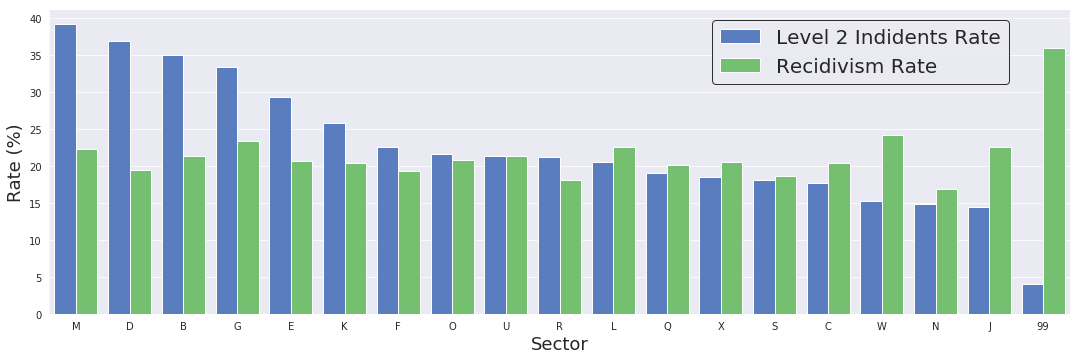

In [69]:
# Merge
df = pd.merge(df_lvl2_norm,df_rec,  on='Sector')
df.columns=['Sector','Level 2 Indidents Rate','Recidivism Rate']
if(log): display(df.head())

# Palette configurations
deep_pal = sns.color_palette('muted')
pal = sns.blend_palette([deep_pal[0], deep_pal[2]],2)

df_res = df.melt('Sector', var_name='cols', value_name='vals')
g = sns.catplot(x="Sector",
                   y="vals",
                   hue='cols',
                   data=df_res,
                   kind ='bar',
                   aspect=3,
                   palette = pal,
                   legend= False)


# # Adjustments to the plot properties
g.ax.legend(fontsize=20,
            loc='upper right',
            bbox_to_anchor=(0.95, 1),
            edgecolor='k')
plt.title('', fontsize=18)    
plt.ylabel('Rate (%)', fontsize=18)
plt.xlabel('Sector', fontsize=18)
plt.show()

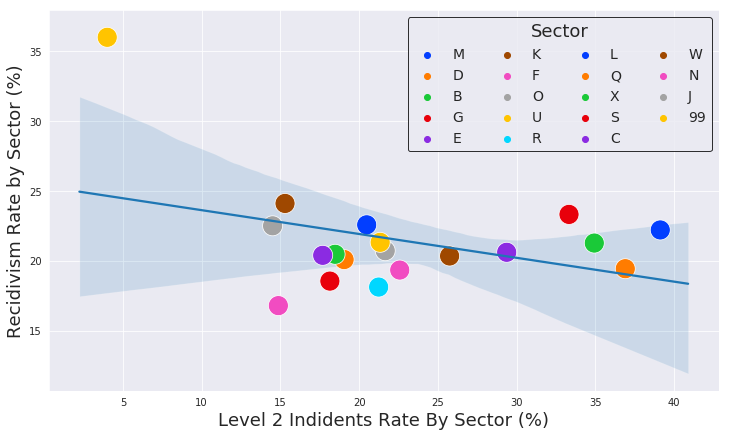

In [70]:
# Figure configurations
plt.figure(figsize=(12,7))

# Plot
sns.regplot(y='Recidivism Rate',
            x='Level 2 Indidents Rate',
            data=df)

g = sns.scatterplot(y='Recidivism Rate',
                x='Level 2 Indidents Rate',
                hue = 'Sector',
                s=400,
                palette= 'bright',
                data=df)

# # Adjustments to the plot properties
h, l = plt.gca().get_legend_handles_labels()
leg = plt.legend(h[1:],l[1:],
                 fontsize=14,
                 ncol=4,
                 loc='upper right',
                 edgecolor='k',
                 title='Sector')
plt.setp(leg.get_title(),fontsize=18)
plt.xlabel('Level 2 Indidents Rate By Sector (%)',fontsize=18)
plt.ylabel('Recidivism Rate by Sector (%)',fontsize=18)
plt.show()

In [71]:
df.corr()

,Level 2 Indidents Rate,Recidivism Rate
Level 2 Indidents Rate,1.000000,-0.381445
Recidivism Rate,-0.381445,1.000000


#### Conclusão:

Há uma correlação negativa (-0.38) entre a taxa de reincidentes e o número de casos do Level-2.

### E a nível individual, existe alguma relação entre o grau de reincidência de um civil e a sua probabilidade de participar de incidentes "Level 2"?

,Subject_ID,Incidents Level 2,Total Incidents
0,4,2,3
1,36,3,3
2,74,5,5


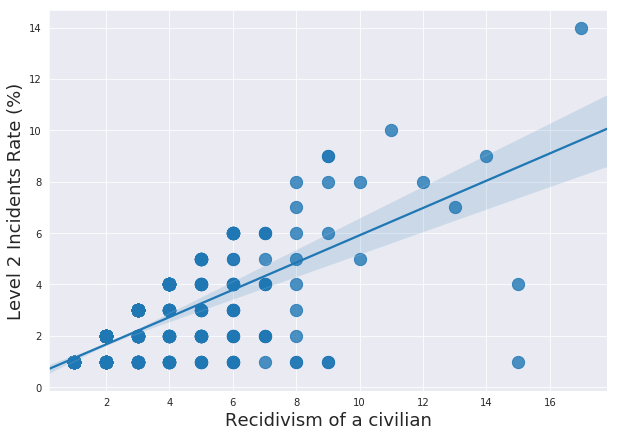

In [73]:
# Compute Recidivism by Subject
df = df_src[['Subject_ID','Incident_Type']]
df = df.groupby(by = ['Subject_ID'], as_index = False).agg('count')
df.columns = ['Subject_ID', 'Total Incidents']

# Level 2 Incidents
df_level2 = df_src[df_src['Incident_Type'] == 'Level 2 - Use of Force']
df_level2 = df_level2[['Subject_ID','Incident_Type']]
df2 = df_level2.groupby(by = ['Subject_ID'],as_index = False).agg('count')
df2.columns = ['Subject_ID', 'Incidents Level 2']

res = pd.merge(df2,df,on='Subject_ID')
if(log): display(res.head(3))

# Figure configurations
plt.figure(figsize=(10,7))
sns.regplot(y="Incidents Level 2",
            x='Total Incidents',
            data=res,
            scatter_kws={'s':150})

plt.title('', fontsize=22)
plt.xlabel('Recidivism of a civilian', fontsize=18)
plt.ylabel("Level 2 Incidents Rate (%)", fontsize=18)

# Show image
plt.show()

In [75]:
res[['Incidents Level 2',	'Total Incidents']].corr()

,Incidents Level 2,Total Incidents
Incidents Level 2,1.000000,0.752394
Total Incidents,0.752394,1.000000


#### Conclusão:
Sim, há uma correlação positiva (0.75) entre reincidências de um determinado civil e a probabilidade de ocorrência de incidências Level-2.
